In [ ]:
import pandas as pd
import numpy as np
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from numpy.random import seed
seed(42)
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import RMSprop
from keras import backend as ker
from math import sqrt
import numpy as np
import pandas as pd
import gc
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

print('imported successfully')

from google.colab import drive
drive.mount('/content/drive')

print('set up google drive file path successfully')

imported successfully
Mounted at /content/drive
set up google drive file path successfully


In [ ]:
daytrain = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Daily-train.csv')
daytest = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Daily-test.csv')
hourtrain = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Hourly-train.csv')
hourtest = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Hourly-test.csv')
monthtrain = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Monthly-train.csv')
monthtest = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Monthly-test.csv')
quartertrain = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Quarterly-train.csv')
quartertest = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Quarterly-test.csv')
weektrain = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Weekly-train.csv')
weektest = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Weekly-test.csv')
yeartrain = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Yearly-train.csv')
yeartest = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/Yearly-test.csv')
m4info = pd.read_csv('/content/drive/MyDrive/GoogleColab/M4_Forcasting/archive/m4_info.csv')
print(m4info['category'].value_counts())
m4info.head(10)

print('file read successfully')

Micro          25121
Finance        24534
Macro          19402
Industry       18798
Demographic     8708
Other           3437
Name: category, dtype: int64
file read successfully


In [ ]:
# This part combine the 6 dataset with M4info, making new column category to each dataset
hourtrainC = pd.merge(hourtrain, m4info, 
                      how = 'left', left_on = ['V1'], right_on = ['M4id'])
hourtrainC.drop(['Frequency', 'Horizon', 'SP', 'StartingDate','M4id'], inplace = True, axis = 1)

monthtrainC = pd.merge(monthtrain, m4info, 
                      how = 'left', left_on = ['V1'], right_on = ['M4id'])
monthtrainC.drop(['Frequency', 'Horizon', 'SP', 'StartingDate','M4id'], inplace = True, axis = 1)

daytrainC = pd.merge(daytrain, m4info, 
                      how = 'left', left_on = ['V1'], right_on = ['M4id'])
daytrainC.drop(['Frequency', 'Horizon', 'SP', 'StartingDate','M4id'], inplace = True, axis = 1)

quartertrainC = pd.merge(quartertrain, m4info, 
                      how = 'left', left_on = ['V1'], right_on = ['M4id'])
quartertrainC.drop(['Frequency', 'Horizon', 'SP', 'StartingDate','M4id'], inplace = True, axis = 1)

yeartrainC = pd.merge(yeartrain, m4info, 
                      how = 'left', left_on = ['V1'], right_on = ['M4id'])
yeartrainC.drop(['Frequency', 'Horizon', 'SP', 'StartingDate','M4id'], inplace = True, axis = 1)

weektrainC = pd.merge(weektrain, m4info, 
                      how = 'left', left_on = ['V1'], right_on = ['M4id'])
weektrainC.drop(['Frequency', 'Horizon', 'SP', 'StartingDate','M4id'], inplace = True, axis = 1)

print('merge successfully')

print(daytrainC['category'].value_counts())

# Here we need to split the data using different category
def splitdataset(data0) :
  micro = data0[data0['category'] == 'Micro']
  finance = data0[data0['category'] == 'Finance']
  other = data0[data0['category'] == 'Other']
  macro = data0[data0['category'] == 'Macro']
  industry = data0[data0['category'] == 'Industry']
  demographic = data0[data0['category'] == 'Demographic']
  micro.drop(['V1', 'category'], inplace = True, axis = 1)
  macro.drop(['V1', 'category'], inplace = True, axis = 1)
  finance.drop(['V1', 'category'], inplace = True, axis = 1)
  demographic.drop(['V1', 'category'], inplace = True, axis = 1)
  other.drop(['V1', 'category'], inplace = True, axis = 1)
  industry.drop(['V1', 'category'], inplace = True, axis = 1)
  return micro, finance, other, macro, industry, demographic

hour_micro, hour_finance, hour_other, hour_macro, hour_industry, hour_demographic = splitdataset(hourtrainC)
month_micro, month_finance, month_other, month_macro, month_industry, month_demographic = splitdataset(monthtrainC)
day_micro, day_finance, day_other, day_macro, day_industry, day_demographic = splitdataset(daytrainC)
quarter_micro, quarter_finance, quarter_other, quarter_macro, quarter_industry, quarter_demographic = splitdataset(quartertrainC)
year_micro, year_finance, year_other, year_macro, year_industry, year_demographic = splitdataset(yeartrainC)
week_micro, week_finance, week_other, week_macro, week_industry, week_demographic = splitdataset(weektrainC)


year_industry.to_csv(r'/content/drive/MyDrive/GoogleColab/M4_Forcasting/Year-Industry.csv', index=False)
print('----------- Successfully export data file to google drive -------------')
day_industry.to_csv(r'/content/drive/MyDrive/GoogleColab/M4_Forcasting/Day-Industry.csv', index=False)
print('----------- Successfully export data file to google drive -------------')
quarter_industry.to_csv(r'/content/drive/MyDrive/GoogleColab/M4_Forcasting/Quarter-Industry.csv', index=False)
print('----------- Successfully export data file to google drive -------------')
hour_industry.to_csv(r'/content/drive/MyDrive/GoogleColab/M4_Forcasting/Hour-Industry.csv', index=False)
print('----------- Successfully export data file to google drive -------------')
week_industry.to_csv(r'/content/drive/MyDrive/GoogleColab/M4_Forcasting/Week-Industry.csv', index=False)
print('----------- Successfully export data file to google drive -------------')
month_industry.to_csv(r'/content/drive/MyDrive/GoogleColab/M4_Forcasting/Month-Industry.csv', index=False)
print('----------- Successfully export data file to google drive -------------')

  

print('dataset prepared successfully')

merge successfully
Finance        1559
Micro          1476
Other           633
Industry        422
Macro           127
Demographic      10
Name: category, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


----------- Successfully export data file to google drive -------------
----------- Successfully export data file to google drive -------------
----------- Successfully export data file to google drive -------------
----------- Successfully export data file to google drive -------------
----------- Successfully export data file to google drive -------------
----------- Successfully export data file to google drive -------------
dataset prepared successfully


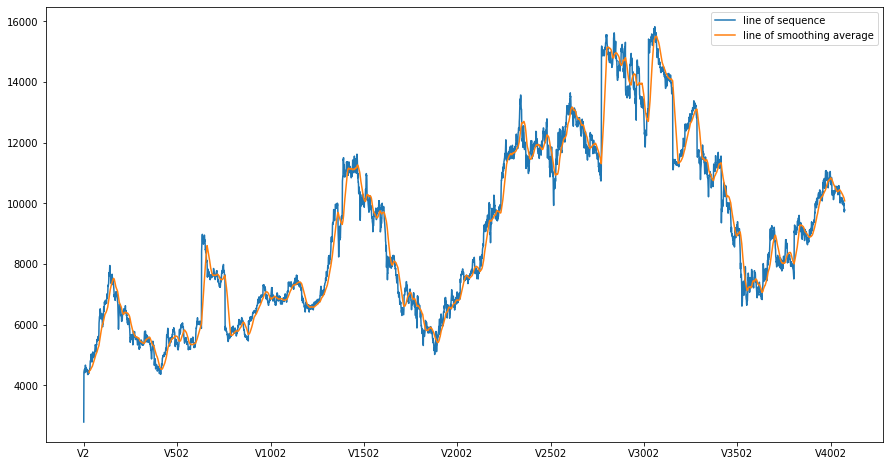

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
day_finance.iloc[760].plot()
day_finance.iloc[760].rolling(30).mean().plot()
plt.legend(["line of sequence", "line of smoothing average"])

In [ ]:
import warnings
import time
# defining the function we may use in the future
'''
data_all = np.array(np.random.random_integers(0, 15, (10, 15)), dtype=np.float32)
for i in range(0, 10):
        for j in range(0, 15):
            data_all[i, j] = j * 10 + data_all[i, j]
counter = 0
# ===== Main loop which goes through all timeseries =====
for j in range(len(data_all)):
  ts = data_all[j, ]
'''









def smape(a, b):
    """
    Calculates sMAPE
    :param a: actual values
    :param b: predicted values
    :return: sMAPE
    """
    a = np.reshape(a, (-1,))
    b = np.reshape(b, (-1,))
    return np.mean(200.0 * np.abs(a - b) / (np.abs(a) + np.abs(b))).item()


def mase(insample, y_test, y_hat_test, freq):
    """
    Calculates MAsE
    :param insample: insample data
    :param y_test: out of sample target values
    :param y_hat_test: predicted values
    :param freq: data frequency
    :return:
    """
    y_hat_naive = []
    for i in range(freq, len(insample)):
        y_hat_naive.append(insample[(i - freq)])

    masep = np.mean(abs(insample[freq:] - y_hat_naive))

    return np.mean(abs(y_test - y_hat_test)) / masep


def detrend(insample_data):
    """
    Calculates a & b parameters of LRL
    :param insample_data:
    :return:
    """
    x = np.arange(len(insample_data))
    a, b = np.polyfit(x, insample_data, 1)
    return a, b

def deseasonalize(original_ts, ppy):
    """
    Calculates and returns seasonal indices
    :param original_ts: original data
    :param ppy: periods per year
    :return:
    """
    """
    # === get in-sample data
    original_ts = original_ts[:-out_of_sample]
    """
    if seasonality_test(original_ts, ppy):
        # print("seasonal")
        # ==== get moving averages
        ma_ts = moving_averages(original_ts, ppy)

        # ==== get seasonality indices
        le_ts = original_ts * 100 / ma_ts
        le_ts = np.hstack((le_ts, np.full((ppy - (len(le_ts) % ppy)), np.nan)))
        le_ts = np.reshape(le_ts, (-1, ppy))
        si = np.nanmean(le_ts, 0)
        norm = np.sum(si) / (ppy * 100)
        si = si / norm
    else:
        # print("NOT seasonal")
        si = np.full(ppy, 100)
    return si

def moving_averages(ts_init, window):
    """
    Calculates the moving averages for a given TS
    :param ts_init: the original time series
    :param window: window length
    :return: moving averages ts
    """
    """
    As noted by Professor Isidro Lloret Galiana:
    line 82:
    if len(ts_init) % 2 == 0:
    
    should be changed to
    if window % 2 == 0:
    
    This change has a minor (less then 0.05%) impact on the calculations of the seasonal indices
    In order for the results to be fully replicable this change is not incorporated into the code below
    """
    
    if len(ts_init) % 2 == 0:
      
        ts_ma = pd.Series(ts_init).rolling(window=12).mean()
        #ts_ma = pd.rolling_mean(ts_ma, 2, center=True)
        ts_ma = np.roll(ts_ma, -1)
    else:
        ts_ma = pd.Series(ts_init).rolling(window=12).mean()
    return ts_ma

def seasonality_test(original_ts, ppy):
    """
    Seasonality test
    :param original_ts: time series
    :param ppy: periods per year
    :return: boolean value: whether the TS is seasonal
    """
    
    # Note that the statistical benchmarks, implemented in R, use the same seasonality test, but with ACF1 being squared
    # This difference between the two scripts was mentioned after the end of the competition and, therefore, no changes have been made 
    # to the existing code so that the results of the original submissions are reproducible
    s = acf(original_ts, 1)
    for i in range(2, ppy):
        s = s + (acf(original_ts, i) ** 2)

    limit = 1.645 * (sqrt((1 + 2 * s) / len(original_ts)))

    return (abs(acf(original_ts, ppy))) > limit


def acf(data, k):
    """
    Autocorrelation function
    :param data: time series
    :param k: lag
    :return:
    """
    m = np.mean(data)
    s1 = 0
    for i in range(k, len(data)):
        s1 = s1 + ((data[i] - m) * (data[i - k] - m))

    s2 = 0
    for i in range(0, len(data)):
        s2 = s2 + ((data[i] - m) ** 2)

    return float(s1 / s2)





def split_into_train_test(data, in_num, fh):
    """
    Splits the series into train and test sets. Each step takes multiple points as inputs
    :param data: an individual TS
    :param fh: number of out of sample points
    :param in_num: number of input points for the forecast
    :return:
    """
    train, test = data[:-fh], data[-(fh + in_num):]
    x_train, y_train = train[:-1], np.roll(train, -in_num)[:-in_num]
    x_test, y_test = train[-in_num:], np.roll(test, -in_num)[:-in_num]
    '''
    print('x_test:' , x_test)
    print('y_test:', y_test)
    '''

    # reshape input to be [samples, time steps, features] (N-NF samples, 1 time step, 1 feature)
    x_train = np.reshape(x_train, (-1, 1))
    x_test = np.reshape(x_test, (-1, 1))
    temp_test = np.roll(x_test, -1)
    temp_train = np.roll(x_train, -1)
    '''
    print(x_train)
    print('ffsfweiocwkcnwekncnewnclrnononalkvnlaen, xtest')
    print(x_test)
    print('ffsfweiocwkcnwekncnewnclrnononalkvnlaen, temptrain')
    print(temp_train)
    print('ffsfweiocwkcnwekncnewnclrnononalkvnlaen, temptest')
    print(temp_test)
    print('-----')
    '''
    for x in range(1, in_num):
        x_train = np.concatenate((x_train[:-1], temp_train[:-1]), 1)
        x_test = np.concatenate((x_test[:-1], temp_test[:-1]), 1)
        temp_test = np.roll(temp_test, -1)[:-1]
        temp_train = np.roll(temp_train, -1)[:-1]
    '''
    print('for the x_train and X-test')
    print(x_train)
    print(x_test)
    '''

    return x_train, y_train, x_test, y_test

def mlp_bench(x_train, y_train, x_test, fh):
    """
    Forecasts using a simple MLP which 6 nodes in the hidden layer
    :param x_train: train input data
    :param y_train: target values for training
    :param x_test: test data
    :param fh: forecasting horizon
    :return:
    """
    y_hat_test = []

    model = MLPRegressor(hidden_layer_sizes=6, activation='identity', solver='adam',
                         learning_rate='adaptive', learning_rate_init=0.001,
                         random_state=42, max_iter=150)
    model.fit(x_train, y_train)

    last_prediction = model.predict(x_test)[0]
    for i in range(0, fh):
        y_hat_test.append(last_prediction)
        x_test[0] = np.roll(x_test[0], -1)
        x_test[0, (len(x_test[0]) - 1)] = last_prediction
        last_prediction = model.predict(x_test)[0]

    return np.asarray(y_hat_test)

def mlp_bench_model(x_train, y_train, x_test, fh, input_size):
    """
    Forecasts using 6 SimpleRNN nodes in the hidden layer and a Dense output layer
    :param x_train: train data
    :param y_train: target values for training
    :param x_test: test data
    :param fh: forecasting horizon
    :param input_size: number of points used as input
    :return:
    """
    
    x_testC = x_test.copy()

    # create the model
    model = MLPRegressor(hidden_layer_sizes=6, activation='identity', solver='adam',
                         learning_rate='adaptive', learning_rate_init=0.001,
                         random_state=42, max_iter=150)
    # fit the model to the training data
    model.fit(x_train, y_train)
    return model




def lstm_bench(x_train, y_train, x_test, fh, input_size) :
    # reshape to match expected input
    x_train = np.reshape(x_train, (-1, input_size, 1))
    x_test = np.reshape(x_test, (-1, input_size, 1))
    x_testC = x_test.copy()

    regressior = Sequential()
    print('xtrain.shape : ', x_train.shape)
    regressior.add(LSTM(units = 4, activation = 'relu', input_shape = (x_train.shape[1], x_train.shape[2]), return_sequences = False))
    regressior.add(Dropout(0.1))

    #regressior.add(LSTM(units = 8, activation = 'relu'))
    #regressior.add(Dropout(0.2))

    regressior.add(Dense(units = 1))
    # fit the model to the training data
    regressior.compile(optimizer='adam', loss = 'mean_squared_error')

    regressior.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

    # make predictions
    y_hat_test = []
    last_prediction = regressior.predict(x_test)[0][0]
    #print(last_prediction)
    for i in range(0, fh):
        y_hat_test.append(last_prediction)
        x_testC[0] = np.roll(x_testC[0], -1)
        x_testC[0, (len(x_testC[0]) - 1)] = last_prediction
        last_prediction = regressior.predict(x_testC)[0][0]

    return np.asarray(y_hat_test)


def lstm_bench_model(x_train, y_train, x_test, fh, input_size) :
    # reshape to match expected input
    x_train = np.reshape(x_train, (-1, input_size, 1))
    x_test = np.reshape(x_test, (-1, input_size, 1))
    x_testC = x_test.copy()

    regressior = Sequential()
    print('xtrain.shape : ', x_train.shape)
    regressior.add(LSTM(units = 4, activation = 'relu', input_shape = (x_train.shape[1], x_train.shape[2]), return_sequences = False))
    regressior.add(Dropout(0.1))

    #regressior.add(LSTM(units = 8, activation = 'relu'))
    #regressior.add(Dropout(0.2))

    regressior.add(Dense(units = 1))
    # fit the model to the training data
    regressior.compile(optimizer='adam', loss = 'mean_squared_error')

    regressior.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
    return regressior





def rnn_bench(x_train, y_train, x_test, fh, input_size):
    """
    Forecasts using 6 SimpleRNN nodes in the hidden layer and a Dense output layer
    :param x_train: train data
    :param y_train: target values for training
    :param x_test: test data
    :param fh: forecasting horizon
    :param input_size: number of points used as input
    :return:
    """
    # reshape to match expected input
    x_train = np.reshape(x_train, (-1, input_size, 1))
    x_test = np.reshape(x_test, (-1, input_size, 1))
    x_testC = x_test.copy()

    # create the model
    model = Sequential([
        SimpleRNN(6, input_shape=(input_size, 1), activation='relu',
                  use_bias=False, kernel_initializer='glorot_uniform',
                  recurrent_initializer='orthogonal', bias_initializer='zeros',
                  dropout=0.1, recurrent_dropout=0.1),
        Dense(1, use_bias=True, activation='linear')
    ])
    model.compile(loss='mean_squared_error', optimizer='Adam') # using Adam optimization

    # fit the model to the training data
    model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)

    # make predictions
    y_hat_test = []
    last_prediction = model.predict(x_testC)[0]
    for i in range(0, fh):
        #print('Now the prediction', i, ' : ', last_prediction)
        y_hat_test.append(last_prediction)
        x_testC[0] = np.roll(x_testC[0], -1)
        x_testC[0, (len(x_testC[0]) - 1)] = last_prediction
        last_prediction = model.predict(x_testC)[0]

    return np.asarray(y_hat_test)

def rnn_bench_model(x_train, y_train, x_test, fh, input_size):
    """
    Forecasts using 6 SimpleRNN nodes in the hidden layer and a Dense output layer
    :param x_train: train data
    :param y_train: target values for training
    :param x_test: test data
    :param fh: forecasting horizon
    :param input_size: number of points used as input
    :return:
    """
    # reshape to match expected input
    x_train = np.reshape(x_train, (-1, input_size, 1))
    x_test = np.reshape(x_test, (-1, input_size, 1))
    x_testC = x_test.copy()

    # create the model
    model = Sequential([
        SimpleRNN(6, input_shape=(input_size, 1), activation='relu',
                  use_bias=False, kernel_initializer='glorot_uniform',
                  recurrent_initializer='orthogonal', bias_initializer='zeros',
                  dropout=0.1, recurrent_dropout=0.1),
        Dense(1, use_bias=True, activation='linear')
    ])
    model.compile(loss='mean_squared_error', optimizer='Adam') # using Adam optimization

    # fit the model to the training data
    model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0)
    return model

def lasso_bench_model(x_train, y_train, x_test, fh, input_size) :
    
    x_testC = x_test.copy()

    # create the model
    model = Lasso()
    # fit the model to the training data
    model.fit(x_train, y_train)

    return model

def lasso_bench(x_train, y_train, x_test, fh, input_size) :
    
    x_testC = x_test.copy()

    # create the model
    model = Lasso()
    # fit the model to the training data
    model.fit(x_train, y_train)
    # make predictions
    y_hat_test = []
    last_prediction = model.predict(x_testC)[0]
    for i in range(0, fh):
        #print('Now the prediction', i, ' : ', last_prediction)
        y_hat_test.append(last_prediction)
        x_testC[0] = np.roll(x_testC[0], -1)
        x_testC[0, (len(x_testC[0]) - 1)] = last_prediction
        last_prediction = model.predict(x_testC)[0]

    return np.asarray(y_hat_test)

def randomforest_bench_model(x_train, y_train, x_test, fh, input_size):
    
    x_testC = x_test.copy()

    # create the model
    model = RandomForestRegressor()
    # fit the model to the training data
    model.fit(x_train, y_train)
    return model

def randomforest_bench(x_train, y_train, x_test, fh, input_size):
    
    x_testC = x_test.copy()

    # create the model
    model = RandomForestRegressor()
    # fit the model to the training data
    model.fit(x_train, y_train)
    # make predictions
    y_hat_test = []
    last_prediction = model.predict(x_testC)[0]
    for i in range(0, fh):
        #print('Now the prediction', i, ' : ', last_prediction)
        y_hat_test.append(last_prediction)
        x_testC[0] = np.roll(x_testC[0], -1)
        x_testC[0, (len(x_testC[0]) - 1)] = last_prediction
        last_prediction = model.predict(x_testC)[0]

    return np.asarray(y_hat_test)


def en_bench(seq, x_train, y_train, x_test, fh, input_size, x2, x3, x4) :
    print('-=-=-=-=-=-=-=-=-=-=-=-=-=-=--=-=-= : ', seq)

    a = np.where(seq == x_train[-1][-1]) # get the index of the last number of the x_train
    kk = seq[:a[0][0]+1]
    if kk.shape[0] < 12 :
      fh = 2
      x_train1, y_train1, x_test1, y_test1 = split_into_train_test(kk, input_size, fh) # Spllit into train and validation dataset
    else :
      fh = round(0.05*kk.shape[0])
      x_train1, y_train1, x_test1, y_test1 = split_into_train_test(kk, input_size, fh) # Spllit into train and validation dataset

    print('  ===== Now we seperately train a RNN, LSTM, RandomForest model')
    #print('x_train1 : ', x_train1)
    timenow = time.time()
    
    RM = rnn_bench_model(x_train1, y_train1, x_test1, fh, input_size)
    # make predictions
    y_hat_test = []
    x_testC = x_test1.copy()
    x_testD = x_test1.copy()
    x_testE = x_test1.copy()
    x_testF = x_test1.copy()
    '''
    last_prediction = RM.predict(x_testC)[0]
    for i in range(0, fh):
        #print('Now the prediction', i, ' : ', last_prediction)
        y_hat_test.append(last_prediction)
        x_testC[0] = np.roll(x_testC[0], -1)
        #print(y_test1[i])
        x_testC[0, (len(x_testC[0]) - 1)] = y_test1[i]
        last_prediction = RM.predict(x_testC)[0]
    yRNN = np.reshape(y_hat_test, (-1)) # get result from RNN model
    print(yRNN)
    #print('x_test1 : ', x_test1)
    '''
    
    lM = lstm_bench_model(x_train1, y_train1, x_test1, fh, input_size)
    # make predictions
    y_hat_test = []

    last_prediction = lM.predict(x_testC)[0][0]
    for i in range(0, fh):
        #print('Now the prediction', i, ' : ', last_prediction)
        y_hat_test.append(last_prediction)
        x_testD[0] = np.roll(x_testD[0], -1)
        x_testD[0, (len(x_testD[0]) - 1)] = y_test1[i]
        last_prediction = lM.predict(x_testD)[0][0]
    ylstm = np.reshape(y_hat_test, (-1)) # get result from RNN model
    print(ylstm)

    fM = randomforest_bench_model(x_train1, y_train1, x_test1, fh, input_size)
    # make predictions
    y_hat_test = []

    last_prediction = fM.predict(x_testE)[0]
    for i in range(0, fh):
        #print('Now the prediction', i, ' : ', last_prediction)
        y_hat_test.append(last_prediction)
        x_testE[0] = np.roll(x_testE[0], -1)
        x_testE[0, (len(x_testE[0]) - 1)] = y_test1[i]
        last_prediction = fM.predict(x_testE)[0]
    yrf = np.reshape(y_hat_test, (-1)) # get result from RNN model
    print(yrf)


    AM = lasso_bench_model(x_train1, y_train1, x_test1, fh, input_size)
    # make predictions
    y_hat_test = []

    last_prediction = AM.predict(x_testE)[0]
    for i in range(0, fh):
        #print('Now the prediction', i, ' : ', last_prediction)
        y_hat_test.append(last_prediction)
        x_testF[0] = np.roll(x_testF[0], -1)
        x_testF[0, (len(x_testF[0]) - 1)] = y_test1[i]
        last_prediction = AM.predict(x_testF)[0]
    yla = np.reshape(y_hat_test, (-1)) # get result from RNN model
    print(yla)

    

    print('. ===== It finishes in ', time.time()-timenow, ' seconds !')
    
    
    X = np.dstack((ylstm, yrf, yla)) # Get the input matrix for linear regression
    print(X)
    Y = y_test1
    

    #
    LR = Lasso()
    
    LR.fit(X[0], Y)
    print(LR.coef_)
    #print(LR.intercept_)
    
    # Get the result
    inputX = np.dstack((x2, x3, x4))[0]
    #print(inputX)
    y_prediction =  LR.predict(inputX)
    return y_prediction

    




def RNN_and_MLP(aData, p):
    

    print(aData.head())
    fh = p         # forecasting horizon
    freq = 1       # data frequency
    in_size = 3    # number of points used as input for each forecast

    
    err_RNN_sMAPE = []
    err_LA_sMAPE = []
    err_RF_sMAPE = []
    err_MLP_sMAPE = []
    err_RNN_MASE = []
    err_lstm_MASE = []
    err_MLP_MASE = []
    err_RF_MASE = []
    err_LA_MASE = []
    err_lstm_sMAPE = []
    err_EN_MASE = []
    err_EN_sMAPE = []
    timeRNN = []
    timeLSTM = []
    timeEN = []
    timeMLP = []
    timeRF = []
    timeLA = []

    # ===== In this example we produce forecasts for 100 randomly generated timeseries =====
    '''
    aData = np.array(np.random.random_integers(0, 100, (100, 20)), dtype=np.float32)
    for i in range(0, 100):
        for j in range(0, 20):
            aData[i, j] = j * 10 + aData[i, j]
    '''
    
    aData = aData.to_numpy()
    

    counter = 0
    # ===== Main loop which goes through all timeseries =====
    for j in range(len(aData)-172):
        
        ts = aData[j][~pd.isnull(aData[j])]
        

        # remove seasonality
        seasonality_in = deseasonalize(ts, freq)

        for i in range(0, len(ts)):
            ts[i] = ts[i] * 100 / seasonality_in[i % freq]

        # detrending
        a, b = detrend(ts)

        for i in range(0, len(ts)):
            ts[i] = ts[i] - ((a * i) + b)
        x_train, y_train, x_test, y_test = split_into_train_test(ts, in_size, fh)
        print('Original sequence : --- ', ts)

        
        start_time = time.time()
        print(' ------  Starting RNN ------')
        # RNN benchmark - Produce forecasts
        y_hat_test_RNN = np.reshape(rnn_bench(x_train, y_train, x_test, fh, in_size), (-1))
        print(y_hat_test_RNN)
        #print(y_test)
        timeRNN.append(time.time() - start_time)
        print("--- %s seconds For Simple RNN ---" % timeRNN[j])
        
        start_time = time.time()
        print(' ------  Starting MLP ------')
        # MLP benchmark - Produce forecasts
        y_hat_test_MLP = mlp_bench(x_train, y_train, x_test, fh)
        
        print(y_hat_test_MLP)
        timeMLP.append(time.time() - start_time)
        print("--- %s seconds For Simple MLP ---" % timeRNN[j])

        start_time = time.time()
        print(' ------  Starting LSTM ------')
        # LSTM benchmark - Produce forecasts
        y_hat_test_lstm = np.reshape(lstm_bench(x_train, y_train, x_test, fh, in_size), (-1))
        print(y_hat_test_lstm)
        #print(y_test)
        timeLSTM.append(time.time() - start_time)
        print("--- %s seconds For LSTM ---" % timeLSTM[j])

        start_time = time.time()
        print(' ------  Starting Random Forest ------')
        # RF benchmark - Produce forecasts
        y_hat_test_rf = np.reshape(randomforest_bench(x_train, y_train, x_test, fh, in_size), (-1))
        print(y_hat_test_rf)
        #print(y_test)
        timeRF.append(time.time() - start_time)
        print("--- %s seconds For Random Forest ---" % timeRF[j])

        start_time = time.time()
        print(' ------  Starting Lasso Regression ------')
        # Lasso benchmark - Produce forecasts
        y_hat_test_la = np.reshape(lasso_bench(x_train, y_train, x_test, fh, in_size), (-1))
        print(y_hat_test_la)
        #print(y_test)
        timeLA.append(time.time() - start_time)
        print("--- %s seconds For Lasso Regression ---" % timeLA[j])
        
        start_time = time.time()
        print(' ------  Starting Ensemble Learning ------')
        # Ensemble benchmark - Produce forecasts
        y_hat_test_en = np.reshape(en_bench(ts, x_train, y_train, x_test, fh, in_size, y_hat_test_lstm, y_hat_test_MLP, y_hat_test_la), (-1))

        #0.5*y_hat_test_RNN + 0.5*y_hat_test_lstm #
        timeEN.append(time.time() - start_time)
        print("--- %s seconds For Ensemble Learning ---" % timeEN[j])
        

        # add trend
        for i in range(0, len(ts)):
            ts[i] = ts[i] + ((a * i) + b)
        
        for i in range(0, fh):
            
            y_hat_test_RNN[i] = y_hat_test_RNN[i] + ((a * (len(ts) + i + 1)) + b)
            y_hat_test_lstm[i] = y_hat_test_lstm[i] + ((a * (len(ts) + i + 1)) + b)
            y_hat_test_en[i] = y_hat_test_en[i] + ((a * (len(ts) + i + 1)) + b)
            y_hat_test_MLP[i] = y_hat_test_MLP[i] + ((a * (len(ts) + i + 1)) + b)
            y_hat_test_rf[i] = y_hat_test_rf[i] + ((a * (len(ts) + i + 1)) + b)
            y_hat_test_la[i] = y_hat_test_la[i] + ((a * (len(ts) + i + 1)) + b)

        # add seasonality
        for i in range(0, len(ts)):
            ts[i] = ts[i] * seasonality_in[i % freq] / 100

        for i in range(len(ts), len(ts) + fh):
            
            y_hat_test_RNN[i - len(ts)] = y_hat_test_RNN[i - len(ts)] * seasonality_in[i % freq] / 100
            y_hat_test_lstm[i - len(ts)] = y_hat_test_lstm[i - len(ts)] * seasonality_in[i % freq] / 100
            y_hat_test_en[i - len(ts)] = y_hat_test_en[i - len(ts)] * seasonality_in[i % freq] / 100
            y_hat_test_MLP[i - len(ts)] = y_hat_test_MLP[i - len(ts)] * seasonality_in[i % freq] / 100
            y_hat_test_rf[i - len(ts)] = y_hat_test_rf[i - len(ts)] * seasonality_in[i % freq] / 100
            y_hat_test_la[i - len(ts)] = y_hat_test_la[i - len(ts)] * seasonality_in[i % freq] / 100


        # check if negative or extreme
        for i in range(len(y_hat_test_lstm)):
            
            if y_hat_test_RNN[i] < 0:
                y_hat_test_RNN[i] = 0
            
            if y_hat_test_lstm[i] < 0:
                y_hat_test_lstm[i] = 0
            
            if y_hat_test_en[i] < 0:
                y_hat_test_en[i] = 0
            
            if y_hat_test_MLP[i] < 0:
                y_hat_test_MLP[i] = 0

            if y_hat_test_rf[i] < 0:
                y_hat_test_rf[i] = 0

            if y_hat_test_la[i] < 0:
                y_hat_test_la[i] = 0
             
            if y_hat_test_RNN[i] > (1000 * max(ts)):
                y_hat_test_RNN[i] = max(ts)
            
            if y_hat_test_lstm[i] > (1000 * max(ts)):
                y_hat_test_lstm[i] = max(ts)
            
            if y_hat_test_en[i] > (1000 * max(ts)):
                y_hat_test_en[i] = max(ts)

            if y_hat_test_MLP[i] > (1000 * max(ts)):
                y_hat_test_MLP[i] = max(ts)

            if y_hat_test_rf[i] > (1000 * max(ts)):
                y_hat_test_rf[i] = max(ts)

            if y_hat_test_la[i] > (1000 * max(ts)):
                y_hat_test_la[i] = max(ts)

        print('Result for RNN : ', y_hat_test_RNN) 
        print('Result for MLP : ', y_hat_test_MLP) 
        print('Result for LSTM : ', y_hat_test_lstm)
        print('Result for Random Forest : ', y_hat_test_rf)
        print('Result for Lasso Regression : ', y_hat_test_la)
        print('Result for Ensemble : ', y_hat_test_en)

        x_train, y_train, x_test, y_test = split_into_train_test(ts, in_size, fh)
        print('ytest : -------- ', y_test)

        # Calculate errors
        
        
        err_RNN_sMAPE.append(smape(y_test, y_hat_test_RNN))
        err_RNN_MASE.append(mase(ts[:-fh], y_test, y_hat_test_RNN, freq))
        
        err_lstm_sMAPE.append(smape(y_test, y_hat_test_lstm))
        err_lstm_MASE.append(mase(ts[:-fh], y_test, y_hat_test_lstm, freq))

        err_EN_sMAPE.append(smape(y_test, y_hat_test_en))
        err_EN_MASE.append(mase(ts[:-fh], y_test, y_hat_test_en, freq))

        err_MLP_sMAPE.append(smape(y_test, y_hat_test_MLP))
        err_MLP_MASE.append(mase(ts[:-fh], y_test, y_hat_test_MLP, freq))

        err_RF_sMAPE.append(smape(y_test, y_hat_test_rf))
        err_RF_MASE.append(mase(ts[:-fh], y_test, y_hat_test_rf, freq))

        err_LA_sMAPE.append(smape(y_test, y_hat_test_la))
        err_LA_MASE.append(mase(ts[:-fh], y_test, y_hat_test_la, freq))

        # memory handling
        ker.clear_session()
        tf.compat.v1.reset_default_graph()
        gc.collect()

        counter = counter + 1
        print("#### LSTM with SMPE ####\n", smape(y_test, y_hat_test_lstm), "\n")
        print("#### LSTM with MASE ####\n", mase(ts[:-fh], y_test, y_hat_test_lstm, freq), "\n")
        print("#### RNN with SMPE ####\n", smape(y_test, y_hat_test_RNN), "\n")
        print("#### RNN with MASE ####\n", mase(ts[:-fh], y_test, y_hat_test_RNN, freq), "\n")
        print("#### MLP with SMPE ####\n", smape(y_test, y_hat_test_MLP), "\n")
        print("#### MLP with MASE ####\n", mase(ts[:-fh], y_test, y_hat_test_MLP, freq), "\n")
        print("#### Random Forest with SMPE ####\n", smape(y_test, y_hat_test_rf), "\n")
        print("#### Random Forest with MASE ####\n", mase(ts[:-fh], y_test, y_hat_test_rf, freq), "\n")
        print("#### Lasso Regression with SMPE ####\n", smape(y_test, y_hat_test_la), "\n")
        print("#### Lasso Regression with MASE ####\n", mase(ts[:-fh], y_test, y_hat_test_la, freq), "\n")
        print("#### Ensemble with SMPE ####\n", smape(y_test, y_hat_test_en), "\n")
        print("#### Ensemble with MASE ####\n", mase(ts[:-fh], y_test, y_hat_test_en, freq), "\n")
        print("------------------- We are finishing running at : ", counter, "/", len(aData)," -------------")
        
        
        
        
        

    print('[~][~][~][~][~][~][~][~][~][~][~][~][~]      All Done    [~][~][~][~][~][~][~][~][~][~][~][~][~][~][~]')
    print("\n\n---------FINAL RESULTS---------")
    print("=============sMAPE=============\n")
    
    print("#### RNN ####\n", np.mean(err_RNN_sMAPE), "\n")
    print("#### LSTM ####\n", np.mean(err_lstm_sMAPE), "\n")
    print("#### MLP ####\n", np.mean(err_MLP_sMAPE), "\n")
    print("#### Random Forest ####\n", np.mean(err_RF_sMAPE), "\n")
    print("#### Lasso Regression ####\n", np.mean(err_LA_sMAPE), "\n")
    print("#### Ensemble ####\n", np.mean(err_EN_sMAPE), "\n")
    print("==============MASE=============")
    
    print("#### RNN ####\n", np.mean(err_RNN_MASE), "\n")
    print("#### LSTM ####\n", np.mean(err_lstm_MASE), "\n")
    print("#### MLP ####\n", np.mean(err_MLP_MASE), "\n")
    print("#### Random Forest ####\n", np.mean(err_RF_MASE), "\n")
    print("#### Lasso Regression ####\n", np.mean(err_LA_MASE), "\n")
    print("#### Ensemble ####\n", np.mean(err_EN_MASE), "\n")

    print("==============Time=============")
    print("#### RNN ####\n", np.mean(timeRNN), "\n")
    print("#### LSTM ####\n", np.mean(timeLSTM), "\n")
    print("#### MLP ####\n", np.mean(timeMLP), "\n")
    print("#### Random Forest ####\n", np.mean(timeRF), "\n")
    print("#### Lasso Regression ####\n", np.mean(timeLA), "\n")
    print("#### Ensemble ####\n", np.mean(timeEN), "\n")

start_time0 = time.time()
warnings.filterwarnings("ignore")
RNN_and_MLP(day_industry, 14)
print("--- %s seconds For Total program ---" % (time.time() - start_time0))

'''
ts = data_all[1,:]
print(ts)
print('==============')
x_train, y_train, x_test, y_test = split_into_train_test(ts, 5, 3)
ypred = rnn_bench(x_train, y_train, x_test, 3, 5)
'''


Streaming output truncated to the last 5000 lines.
  8.8843092e-02  8.8843092e-02  8.8843092e-02  8.8843092e-02
  8.8843092e-02  8.8843092e-02  8.8843092e-02  8.8843092e-02
  8.8843092e-02  8.8843092e-02  8.8843092e-02  8.8843092e-02
  8.8843092e-02  8.8843092e-02  8.8843092e-02  8.8843092e-02]
[-966.41021359 -889.69200119 -915.47901964 -961.22625146 -876.27092018
 -965.55571176 -958.95954438 -855.99725528 -570.74962823 -560.07057144
 -442.56229923 -473.08475685 -507.87459662 -498.64726599 -535.11073329
 -393.35551153 -332.45525411 -394.89938981 -309.17754988 -459.4637306
 -490.7435247  -580.34126469 -651.21996365 -612.53008569 -522.68817767
 -543.76357704 -558.32751593 -561.96228347 -523.51437415 -686.55985656
 -701.51905783 -706.5446548  -691.83247946 -621.62933929 -581.86529411
 -545.53206928 -385.61179186 -262.84932253  -59.55432001   24.30690385
  164.09995188   98.46619645  345.12059866  293.32450018  147.01322985
   55.40380773   73.87111674  344.98226422  527.88803395  882.2651

"\nts = data_all[1,:]\nprint(ts)\nprint('==============')\nx_train, y_train, x_test, y_test = split_into_train_test(ts, 5, 3)\nypred = rnn_bench(x_train, y_train, x_test, 3, 5)\n"